In [ ]:
! git clone https://github.com/rafliogun49/Buat-Tugas-UTS.git # mengambil data dari repository saya yang telah melakukan forking penulis 

fatal: destination path 'Buat-Tugas-UTS' already exists and is not an empty directory.


In [ ]:
import pandas as pd # mengimport library pandas
import os # mengimport library os untuk memanipulasi file dalam folder

In [ ]:
files = [file for file in os.listdir('Buat-Tugas-UTS/SalesAnalysis/Sales_Data')] # membuat list yang berisi nama-nama file sales tiap bulannya

all_months_data = pd.DataFrame() # membuat dataframe bernama all_months_data

for file in files: # melakukan perulangan file dalam list files
  df = pd.read_csv("Buat-Tugas-UTS/SalesAnalysis/Sales_Data/" + file) # membuat dataframe untuk membaca setiap file
  all_months_data = pd.concat([all_months_data, df]) # memasukkan data setiap filenya ke dalam dataframe

all_months_data.to_csv("all_data.csv", index=False) # membuat file csv baru bernama all_data.csv dari data pada variabel all_months_data

#### Read in updated dataframe

In [ ]:
all_data = pd.read_csv("all_data.csv") # membaca file all_data.csv
all_data.head() # menampilkan 5 data pertama pada all_data.csv

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


#### Clean up the data!

#### Drop rows of NaN

In [ ]:
nan_df = all_data[all_data.isna().any(axis=1)] # mencari data yang kosong pada tabel
nan_df.head() # menampilkan 5 data yang kosong
# tidak ada data NaN sehingga tidak memunculkan output apa-apa


all_data = all_data.dropna(how='all') # menghilangkan seluruh data NaN pada tabel
all_data.head() # menampilkan 5 data yang sudah dibersihkan dari NaN

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


#### Find 'Or' and delete it

Memfilter data dari judul-judul kolom yang tergabung dalam all_data.csv

In [ ]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or'] # Mengambil seluruh data yang mana di kolom Order datenya itu tidak mengandung kata awal 'Or'
all_data.head() # Menampilkan tabel all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


#### convert columns to correct type

In [ ]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"]) # Mengubah tipe data nilai pada kolom "Quantity Ordered" menjadi number (int)
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"]) #Mengubah tipe data nilai pada kolom "Price Each" menjadi number (float)

all_data.head() # Menampilkan tabel all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


## Augment data with additional columns

#### Task 2: Add Month Column

In [ ]:
all_data['Month'] = all_data['Order Date'].str[0:2] # membuat kolom baru bernama 'Month' yang isinya itu dua huruf pertama dari kolom 'Order Date'
all_data['Month'] = all_data['Month'].astype('int32') # mengubah tipe data pada kolom 'Month' menjadi bilangan bulat (integer)
all_data.head() # menampilkan 5 data pertama all_data 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11


#### Task 3: Add a sales column

In [ ]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"] # Membuat kolom baru bernama 'Sales' yang isinya adalah perkalian dari kolom "Quantity Order" dengan "Price Each"
all_data.head()  # menampilkan 5 data pertama all_data 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99


#### Add a city column

In [ ]:
def get_city(address): # membuat function untuk mengambil data kota yang menerima parameter address
  return address.split(',')[1] # mengambil nama kota dengan cara split kalimat pada tanda koma "," kemudian mengambil data kedua pada listnya

def get_state(address): # membuat function untuk mengambil data negara bagian yang menerima parameter address
  return address.split(',')[2].split(' ')[1] #mengambil nama negara bagian dengan cara split pada tanda koma ",", kemudian mengambil data ketiga pada listnya, lalu memisahkan data tersebut pada spasi " ", kemudian mengambil data yang kedua

#lambda x for grab content in cell
all_data["City"] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") # membuat kolom "City" dengan mengambil nilai kota dan negara bagian dari kolom "Purchase Address" menggunakan function get_city dan get_state


all_data.head() # menampilkan 5 data pertama all_data 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City (NY)
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin (TX)
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles (CA)
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle (WA)
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston (MA)


##### Question 1: Bulan apa yang mengalami sales terbaik? berapa jumlah salesnya?

In [ ]:
results = all_data.groupby('Month').sum() # membuat variabel bernama results yang mengaggregasi data berdasarkan kolom 'Month'
print(results) # mencetak variabel results

       Quantity Ordered  Price Each       Sales
Month                                          
1                 10903  1811768.38  1822256.73
2                 13449  2188884.72  2202022.42
3                 17005  2791207.83  2807100.38
4                 20558  3367671.02  3390670.24
5                 18667  3135125.13  3152606.75
6                 15253  2562025.61  2577802.26
7                 16072  2632539.56  2647775.76
8                 13448  2230345.42  2244467.88
9                 13109  2084992.09  2097560.13
10                22703  3715554.83  3736726.88
11                19798  3180600.68  3199603.20
12                28114  4588415.41  4613443.34


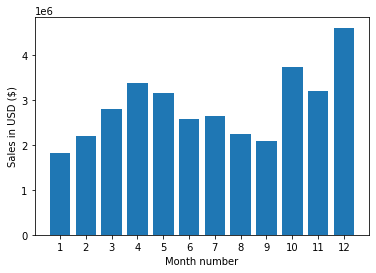

In [ ]:
import matplotlib.pyplot as plt # mengimport library matplotlib

months= range(1,13) # membuat list dengan nilai 1 hingga 12
plt.bar(months, results['Sales']) # membuat diagram batang dengan x = Months dan y = kolom 'Sales' dari results
plt.xticks(months) # set nilai months sebagai poin-poin pada sumbu x
plt.ylabel('Sales in USD ($)') # set label pada sumbu y
plt.xlabel('Month number') # set label pada sumbu x
plt.show() # menampilkan hasil dari pembuatan diagramnya

Hasil menunjukkan bahwa bulan Desember merupakan bulan dengan penjualan terbanyak dengan jumlah USD 4613443.34

#### Pertanyaan 2: Kota apa yang memiliki penjualan tertinggi?

In [ ]:
results = all_data.groupby('City').sum() # menjalankan pertambahan pada tabel all_data berdasarkan kolom "City"
results # running variabel results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


[' Atlanta (GA)', ' Austin (TX)', ' Boston (MA)', ' Dallas (TX)', ' Los Angeles (CA)', ' New York City (NY)', ' Portland (ME)', ' Portland (OR)', ' San Francisco (CA)', ' Seattle (WA)']


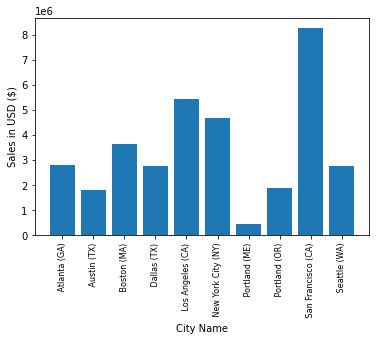

In [ ]:
cities= [city for city, df in all_data.groupby('City')] # membuat list setiap kota 
print(cities) # mencetak nilai cities

plt.bar(cities, results['Sales']) # membuat diagram batang dengan x = kota dan y = kolom 'Sales' dari results
plt.xticks(cities, rotation='vertical', size=8) # membuat tulisan pada sumbu x terlihat vertical dan memiliki font berukuran 8
plt.ylabel('Sales in USD ($)') # memasang label pada sumbu y
plt.xlabel('City Name')# memasang label pada sumbu x
plt.show() # menampilkan hasil diagram

Sales tertinggi terjadi di kota San Fransisco (CA)


#### Pertanyaan 3: Kapan kita harus menampilkan iklan untuk memaksimalkan kemungkinan pelanggan membeli produk?

In [ ]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date']) # mengubah nilai pada kolom "Order Date" menjadi format tanggal

In [ ]:
all_data['Hour'] = all_data['Order Date'].dt.hour # mengekstrak data jam pada kolom "Order Date", kemudian dimasukkan ke dalam kolom "Hour"
all_data['Minute'] = all_data['Order Date'].dt.minute # mengekstrak data menit pada kolom "Order Date", kemudian dimasukkan ke dalam kolom "Minute"
all_data.head() # menampilkan 5 data pertama pada tabel all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.99,New York City (NY),9,54
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.90,Austin (TX),10,3
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles (CA),14,56
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.99,Seattle (WA),22,24
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.99,Boston (MA),13,56


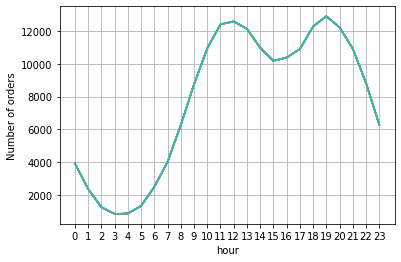

In [ ]:
hours= [hour for hour, df in all_data.groupby('Hour')] # membuat list jam dari all_data.groupby('Hour')

plt.plot(hours, all_data.groupby("Hour").count()) # membuat diagram garis dengan nilai x = jam dan nilai y = jumlah data dari jam
plt.xticks(hours) # membuat nilai sumbu x nya sama dengan list hours
plt.xlabel('hour') # membuat label pada sumbu x
plt.ylabel('Number of orders') # membuat label pada sumbu y
plt.grid() # membuat grid (kisi) pada diagram
plt.show() # menampilkan diagram

pilihan terbaik untuk memasang iklan adalah jam 11.30 siang dan jam 18.30 malam

#### Pertanyaan 4: Produk apa yang paling dibeli secara bersamaan?

In [ ]:
df = all_data[all_data['Order ID'].duplicated(keep=False)] # menghilangkan data duplikat pada tabel all_data

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) # Membuat kolom "Grouped" yang berisi gabungan product yang memiliki "Order Id" yang sama

df = df[['Order ID', 'Grouped']].drop_duplicates() # membuat tabel berisi kolom "Order ID" dan "Grouped" yang tidak memiliki data double

df.head(10) # menampilkan 10 data pertama tabel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
9,278806,"Bose SoundSport Headphones,ThinkPad Laptop"
15,278811,"Wired Headphones,Apple Airpods Headphones"
24,278819,"iPhone,Apple Airpods Headphones"
39,278833,"iPhone,Lightning Charging Cable"
47,278840,"Bose SoundSport Headphones,27in FHD Monitor"
65,278857,"USB-C Charging Cable,AAA Batteries (4-pack)"
151,278940,"Apple Airpods Headphones,AAA Batteries (4-pack)"
156,278944,"Google Phone,Bose SoundSport Headphones"
159,278946,"iPhone,Lightning Charging Cable,Wired Headphones"
185,278970,"Google Phone,USB-C Charging Cable"


In [ ]:
# counting unique pairs of number into a python dictionary
from itertools import combinations # import library combinations
from collections import Counter # import library counter

count = Counter() # membuat variabel count yang berisi function Counter

for row in df['Grouped']: # looping setiap baris dalam kolom "Grouped"
  row_list = row.split(',') # membuat variabel row_list yang memisahkan item-itemnya dengan tanda koma ","
  count.update(Counter(combinations(row_list, 2))) # membuat berbagai kombinasi sepasang dua produk

for key, value in count.most_common(10): # mengambil 10 data pasangan produk yang paling banyak terjual
  print(key, value) # mencetak nilai key yang berisi sepasang produk dan value yang berisi jumlah produk yang terjual

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Iphone dan Lightning Charging Cable adalah produk yang paling sering dibeli bersamaan dengan jumlah 1005 pasang

#### Pertanyaan 5: Produk apa yang paling sering terjual? Mengapa bisa demikian?

In [ ]:
all_data.head() # mencetak 5 data pertama pada tabel all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.99,New York City (NY),9,54
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.90,Austin (TX),10,3
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles (CA),14,56
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.99,Seattle (WA),22,24
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.99,Boston (MA),13,56


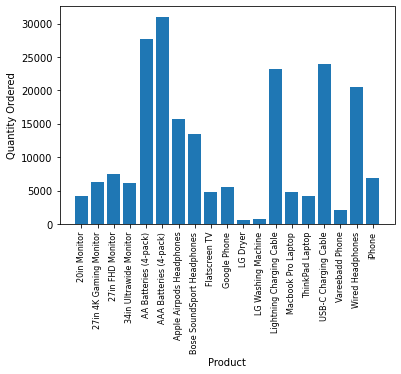

In [ ]:
product_group = all_data.groupby('Product') # membuat variabel product_group untuk mengelompokkan data berdasarkan "Product"
quantity_ordered = product_group.sum()['Quantity Ordered'] # menghitung jumlah kuantitas setiap produknya

products= [product for product, df in product_group] # membuat list jenis produk

plt.bar(products, quantity_ordered) # membuat diagram dengan nilai x = jenis produk dan nilai y = jumlah pembelian produk
plt.xticks(products, rotation='vertical', size=8) # membuat teks pada sumbu x menjadi vertical dan memiliki ukuran font 8
plt.ylabel('Quantity Ordered') # membuat label y
plt.xlabel('Product')# membuat label x
plt.show()# menampilkan diagram

Berdasarkan data, baterai merupakan produk yang paling banyak terjual. Hipotesisnya adalah baterai banyak terjual karena memiliki harga yang murah

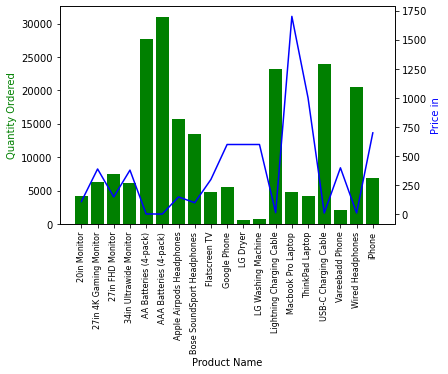

In [ ]:
prices = all_data.groupby('Product').mean()['Price Each'] # mengambil harga rata-rata setiap produknya

fig,ax1 = plt.subplots() # membuat diagram yang memiliki subplot

ax2 = ax1.twinx() # x dari ax2 sama dengan ax1
ax1.bar(products,quantity_ordered, color='g') # membuat diagram batang dengan nilai x = jenis produk dan y = jumlah penjualan setiap produk
ax2.plot(products, prices, 'b-') # membuat diagram garis dengan nilai x = jenis produk dan y = harga setiap jenis produk

ax1.set_xlabel('Product Name') # membuat label pada sumbu x
ax1.set_ylabel('Quantity Ordered', color='g') # membuat label pada sumbu y dengan warna hijau
ax2.set_ylabel('Price in', color='b') # membuat label pada sumbu y dengan warna biru
ax1.set_xticklabels(products, rotation='vertical', size=8) # membuat tulisan pada sumbu x menjadi vertical dengan size font 8
plt.show() # menampilkan diagram

Pembuktian hipotesis telah terbukti karena baterai yang merupakan product dengan penjualan terbanyak ternyata memiliki harga yang murah dan produk yang berharga mahal seperti Macbook Pro mengalami penjualan yang rendah